# Predicting practice behavior of those who practice before

## Importing packages

In [1]:
#install.packages("here")
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
source(here('Modules','data_cleaning.R'))
source(here('Modules','unsupervised_learning.R'))
#install_all_packages()
load_library_packages()

Warning message:
"package 'here' was built under R version 4.1.1"
here() starts at C:/Users/maria/Desktop/Programacao/IC/projetos/Barreiras-e-Facilitadores

Warning message:
"package 'ggplot2' was built under R version 4.1.1"
Warning message:
"package 'cowplot' was built under R version 4.1.1"
Warning message:
"package 'randomForest' was built under R version 4.1.1"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


Warning message:
"package 'caret' was built under R version 4.1.1"
Carregando pacotes exigidos: lattice

Warning message:
"package 'lattice' was built under R version 4.1.1"
Warning message:
"package 'rpart.plot' was built under R version 4.1.1"
Carregando pacotes exigidos: rpart

Warning message:
"package 'readxl' was built under R version 4.1.2"
Warning message:
"package 'e1071' was built under R version 4.1.1"
Warning message:
"package 'Augmen

Performing PCA
Read the 1242 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 100.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 1.05 seconds (sparsity = 0.326346)!
Learning embedding...
Iteration 50: error is 57.596822 (50 iterations in 0.46 seconds)
Iteration 100: error is 57.596822 (50 iterations in 0.46 seconds)
Iteration 150: error is 57.596822 (50 iterations in 0.62 seconds)
Iteration 200: error is 57.596822 (50 iterations in 0.79 seconds)
Iteration 250: error is 57.596830 (50 iterations in 1.01 seconds)
Iteration 300: error is 2.314829 (50 iterations in 0.98 seconds)
Iteration 350: error is 1.307825 (50 iterations in 0.46 seconds)
Iteration 400: error is 1.264104 (50 iterations in 0.30 seconds)
Iteration 450: error is 1.259163 (50 iterations in 0.31 seconds)
Iteration 500: error is 1.254181 (50 iterations in 0.32 seconds)
Iteration 550: error is 1.251289 (50 iterations in 0.32 seconds)
Iteration 6

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

[[21]]
[1] TRUE

[[22]]
[1] TRUE

[[23]]
[1] TRUE

[[24]]
[1] TRUE

[[25]]
[1] TRUE

[[26]]
[1] TRUE

[[27]]
[1] TRUE

[[28]]
[1] TRUE

## Outliers

In [2]:
table(pa_behavior_dataset[, "pa_behavior"])
practice_before <- c("change_to_dont_practice", "still_practice")
dont_practice_before <- c("change_to_practice", "still_dont_practice")
pa_behavior_dataset_1 <- pa_behavior_dataset[pa_behavior_dataset$pa_behavior %in% practice_before, ]

new_levels <- droplevels(pa_behavior_dataset_1[, "pa_behavior"], exclude = levels(pa_behavior_dataset_1[, "pa_behavior"]) %in% dont_practice_before)
pa_behavior_dataset_1[, "pa_behavior"] <- new_levels

table(pa_behavior_dataset_1[, "pa_behavior"])


change_to_dont_practice      change_to_practice     still_dont_practice 
                    270                      69                      76 
         still_practice 
                    827 


change_to_dont_practice          still_practice 
                    270                     827 

#### Outlier: Strange Dont Practice

In [3]:
pa_behavior_dataset_copy <- pa_behavior_dataset_1
pa_behavior_dataset_copy["outlier"] <- strange_p[as.numeric(rownames(pa_behavior_dataset_1))]
outliers_result <- outliers_checker(distances_sp, pa_behavior_dataset_copy, "pa_behavior")

ERROR: Error: `data` and `reference` should be factors with the same levels.


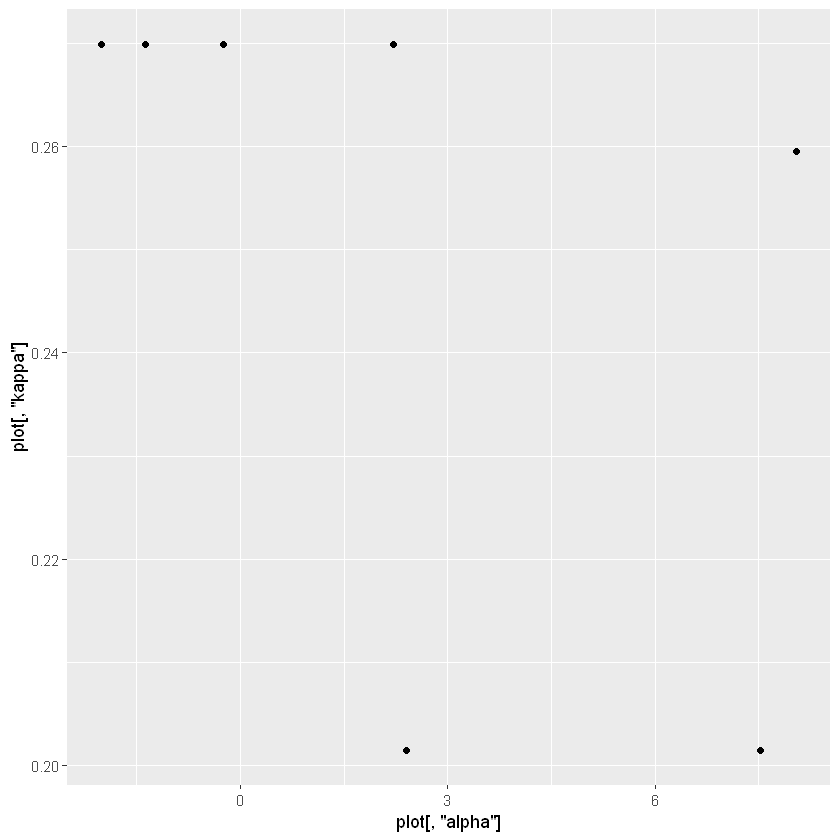

In [4]:
plot <- outliers_result$kappa_x_alpha
ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

#### New Train and Test
The outliers check in the strange dont practice showed that we should delete 1 record

In [5]:
pa_behavior_train <- outliers_result$best_model$train
pa_behavior_test <- outliers_result$best_model$test

## Models

In [6]:
dim(pa_behavior_dataset_1)
table(pa_behavior_dataset_1[, "pa_behavior"])

[1] 1097   73


change_to_dont_practice          still_practice 
                    270                     827 

There is a majority class, we should apply data augmentation. We chose kappa metrict to optimize becouse data is unbalanced.

### Applying augmentation into the training set: practice before

In [7]:
pa_behavior_train.aug <- data_augmentation(
    train_data=pa_behavior_train,
    yname="pa_behavior",
    maj_class = "still_practice",
    min_classes = c("change_to_dont_practice"),
    ycol=match("pa_behavior",names(pa_behavior_dataset_1))
)

table(pa_behavior_train.aug[, "pa_behavior"])



change_to_dont_practice          still_practice 
                    579                     579 

### Kappa metric without augmentation: practice before

Confusion Matrix and Statistics

                         Reference
Prediction                change_to_dont_practice still_practice
  change_to_dont_practice                      21             11
  still_practice                               60            237
                                                 
               Accuracy : 0.7842                 
                 95% CI : (0.7358, 0.8274)       
    No Information Rate : 0.7538                 
    P-Value [Acc > NIR] : 0.1109                 
                                                 
                  Kappa : 0.2699                 
                                                 
 Mcnemar's Test P-Value : 1.223e-08              
                                                 
            Sensitivity : 0.25926                
            Specificity : 0.95565                
         Pos Pred Value : 0.65625                
         Neg Pred Value : 0.79798                
             Prevalence : 0.24620    

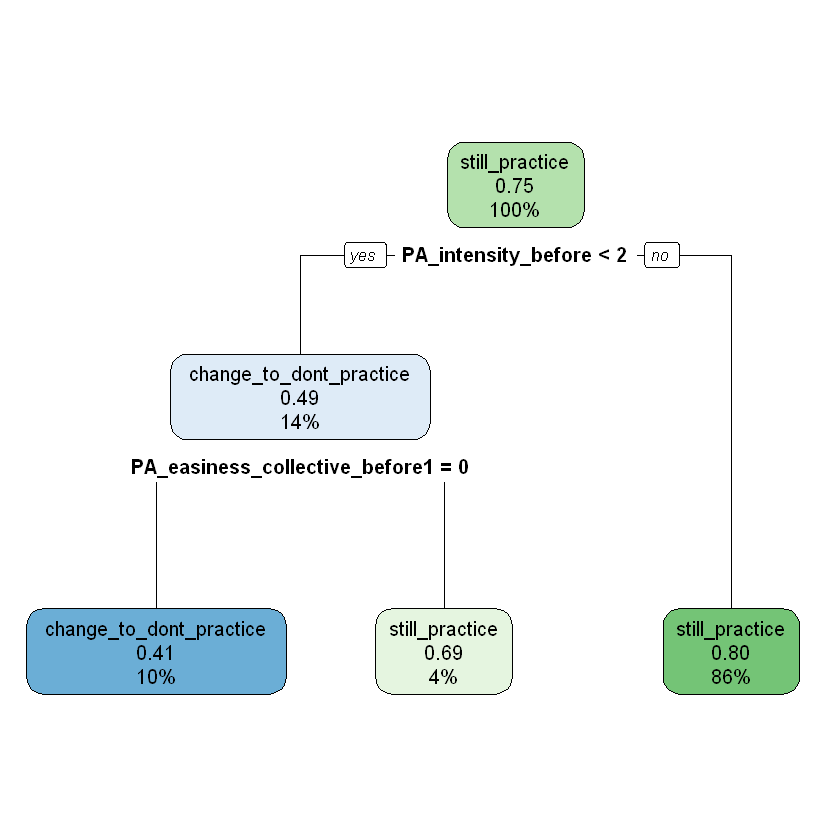

In [8]:
set.seed(2)
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = pa_behavior_train,
    test_data=pa_behavior_test,
    yname="pa_behavior",
    length = 3
)
print(model$matrix)
# print(model$result)
rpart.plot(model$result$finalModel)



### Accuracy metric with augmentation: practice before

Confusion Matrix and Statistics

                         Reference
Prediction                change_to_dont_practice still_practice
  change_to_dont_practice                      50             85
  still_practice                               31            163
                                                 
               Accuracy : 0.6474                 
                 95% CI : (0.5931, 0.699)        
    No Information Rate : 0.7538                 
    P-Value [Acc > NIR] : 1                      
                                                 
                  Kappa : 0.2242                 
                                                 
 Mcnemar's Test P-Value : 8.614e-07              
                                                 
            Sensitivity : 0.6173                 
            Specificity : 0.6573                 
         Pos Pred Value : 0.3704                 
         Neg Pred Value : 0.8402                 
             Prevalence : 0.2462     

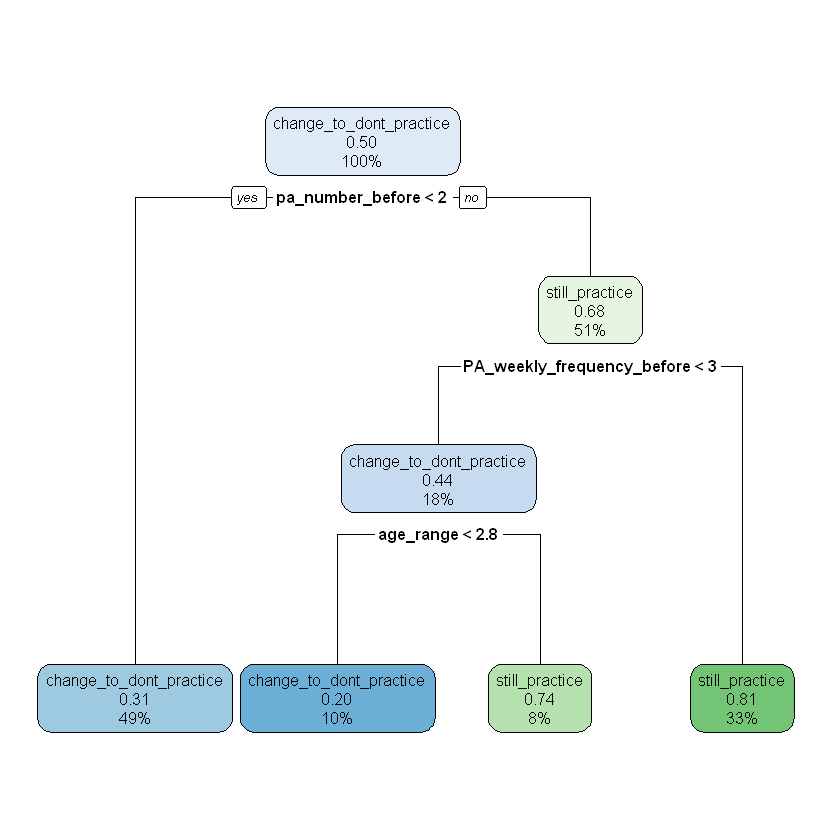

In [9]:
model <- fit_model(
    model_method="rpart",
    model_metric="Accuracy",
    trControl_func = trainControl(method = "cv"),
    train_data = pa_behavior_train.aug,
    test_data=pa_behavior_test,
    yname="pa_behavior",
    length=3
)
print(model$matrix)
rpart.plot(model$result$finalModel)

### RF practice before: Kappa metric without augmentation

In [10]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = pa_behavior_train,
    test_data=pa_behavior_test,
    yname="pa_behavior",
    length = 15
)
print(model$matrix)

Confusion Matrix and Statistics

                         Reference
Prediction                change_to_dont_practice still_practice
  change_to_dont_practice                      25             10
  still_practice                               56            238
                                                 
               Accuracy : 0.7994                 
                 95% CI : (0.752, 0.8413)        
    No Information Rate : 0.7538                 
    P-Value [Acc > NIR] : 0.0297                 
                                                 
                  Kappa : 0.3318                 
                                                 
 Mcnemar's Test P-Value : 3.04e-08               
                                                 
            Sensitivity : 0.30864                
            Specificity : 0.95968                
         Pos Pred Value : 0.71429                
         Neg Pred Value : 0.80952                
             Prevalence : 0.24620    

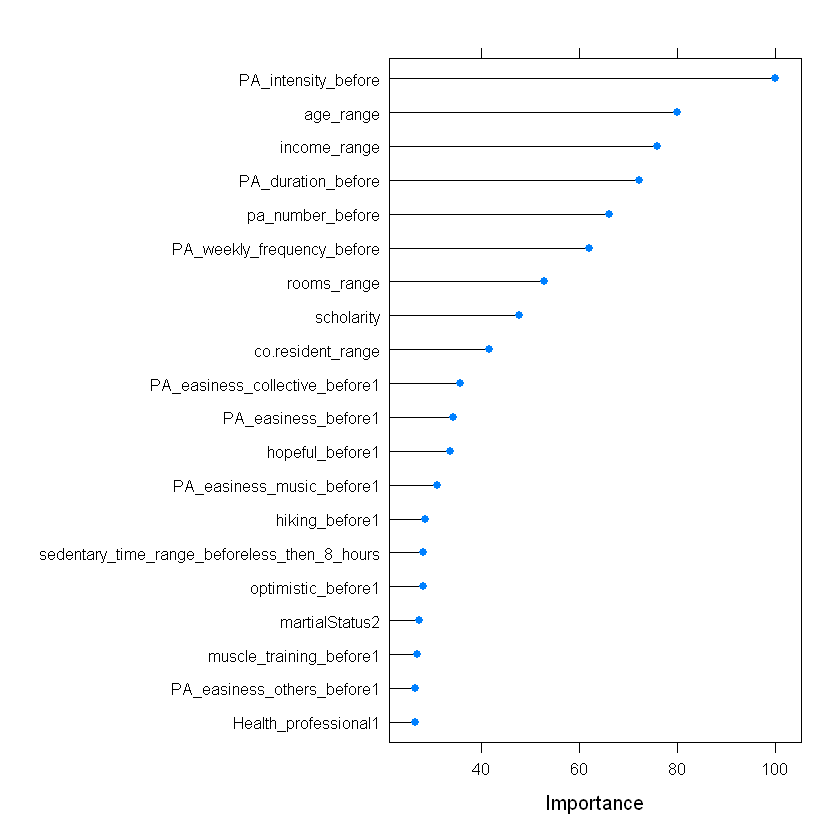

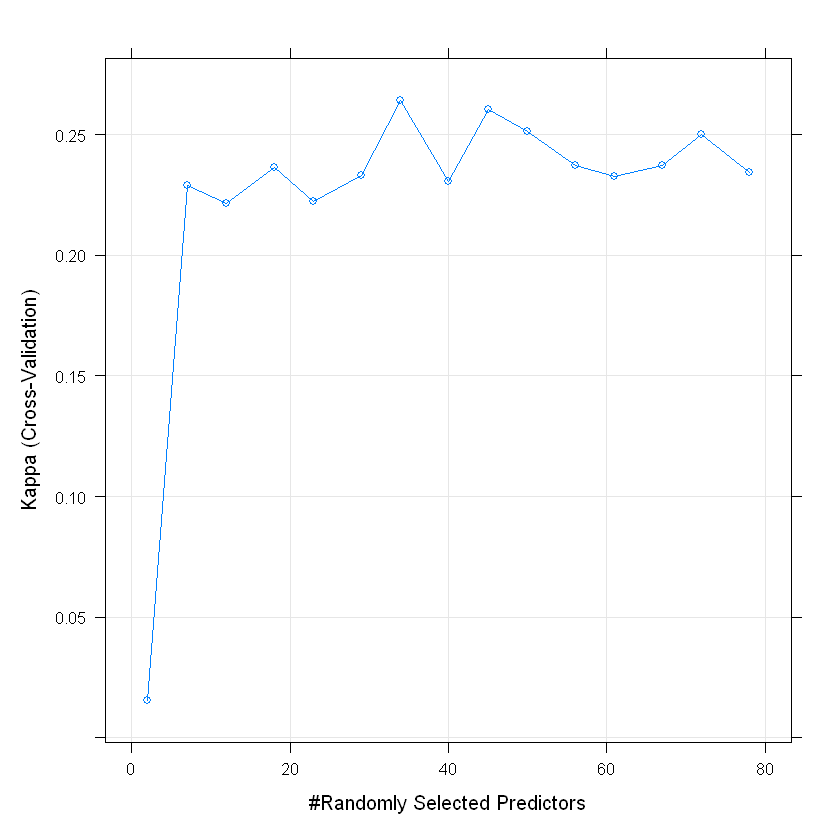

In [11]:
plot(varImp(model$result), top=20)
plot(model$result)


### RF practice before: Accuracy metric with augmentation

In [12]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Accuracy",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = pa_behavior_train.aug,
    test_data=pa_behavior_test,
    yname="pa_behavior",
    length = 15
)
print(model$matrix)

Confusion Matrix and Statistics

                         Reference
Prediction                change_to_dont_practice still_practice
  change_to_dont_practice                      23              4
  still_practice                               58            244
                                                 
               Accuracy : 0.8116                 
                 95% CI : (0.765, 0.8524)        
    No Information Rate : 0.7538                 
    P-Value [Acc > NIR] : 0.00766                
                                                 
                  Kappa : 0.3453                 
                                                 
 Mcnemar's Test P-Value : 1.685e-11              
                                                 
            Sensitivity : 0.28395                
            Specificity : 0.98387                
         Pos Pred Value : 0.85185                
         Neg Pred Value : 0.80795                
             Prevalence : 0.24620    

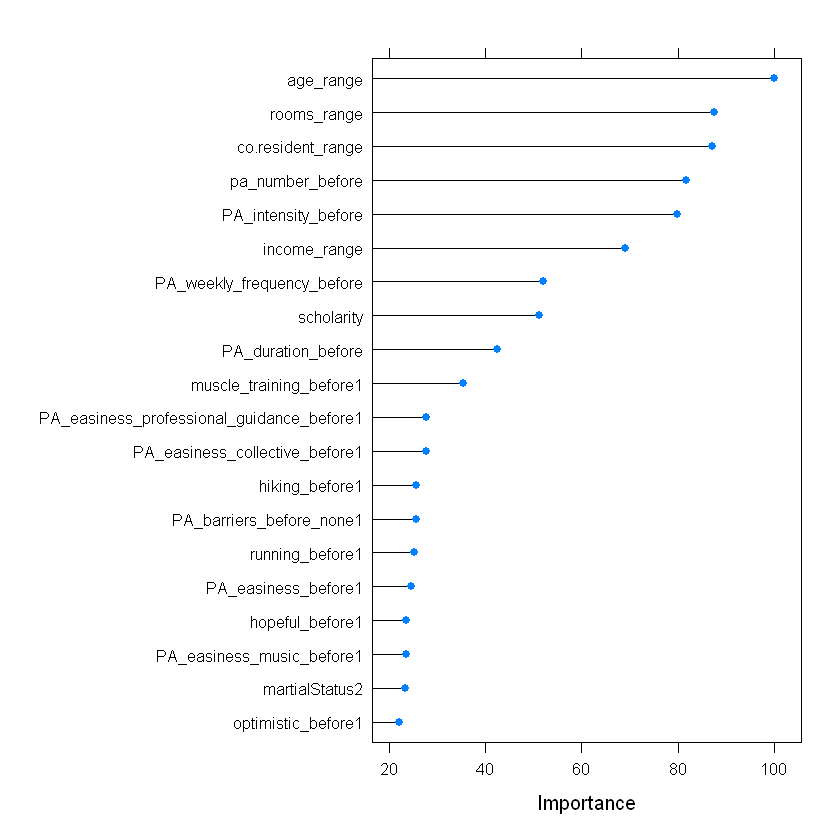

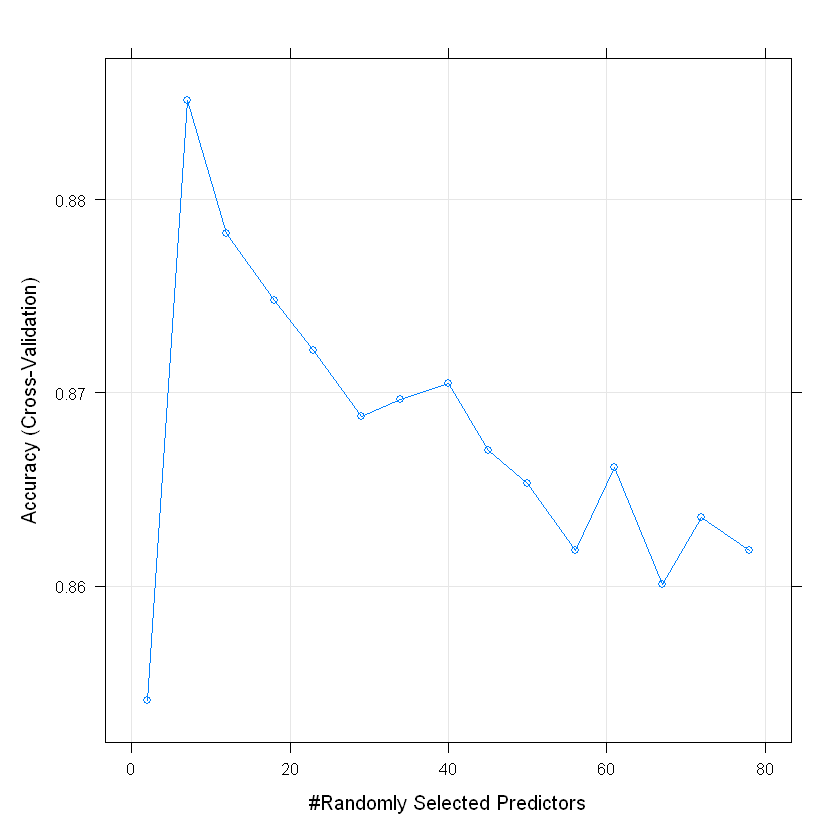

In [13]:
plot(varImp(model$result), top=20)
plot(model$result)
